### Pandas Plot
주식에서 많이 활용할 그래프는 Line Chart 와 Bar Chart 입니다. 보통 주가의 흐름은 Line Chart 로 표시하고, 거래량은 Bar Chat 로 표시합니다. 이 두 가지를 연습해 보겠습니다. 그래프는 DataFrame 에서도 만들 수 있습니다. 복잡한 그래프를 그리려면 Matplotlib 를 이용하는데요. 이번 섹션에는 Pandas 에서 제공하는 Plot 을 이용하겠습니다. 먼저 DataFrame 에서 제공하는 plot 메소드로 간단하게 그리는 법을 연습하겠습니다. 삼성전자 일봉을 가져옵니다.

In [36]:
import FinanceDataReader as fdr 
import pandas as pd

code = '005930' # 삼성전자
stock_data = fdr.DataReader(code, start='2021-01-03', end='2021-12-31') 

stock_data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170


먼저 종가를 Line Chart 로 그려봅니다. 2021년 주가흐름이 내리막입니다. 

<AxesSubplot:xlabel='Date'>

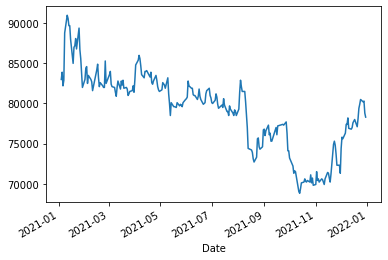

In [37]:
stock_data['Close'].plot()

<br>
위 그래프를 조금 크게 그리고 싶습니다. 인수에 figsize=(15,5) 라고 넣어줍니다. 차트에 제목도 추가 하고 싶습니다. 인수에 title = 'Samsung Electronics' 라고 넣어줍니다. 

<AxesSubplot:title={'center':'Samsung Electronics'}, xlabel='Date'>

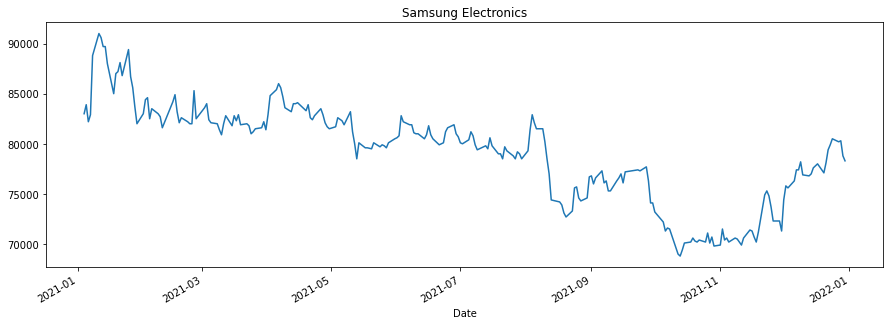

In [38]:
stock_data['Close'].plot(figsize=(15,5), title = 'Samsung Electronics')

<br> 
이번에는 거래량을 Bar Chart 로 그리고 싶습니다. 인수 kind='bar' 를 넣어서 Bar Chat 를 그리고 싶다는 것을 알려줍니다.

<AxesSubplot:title={'center':'Samsung Electronics'}, xlabel='Date'>

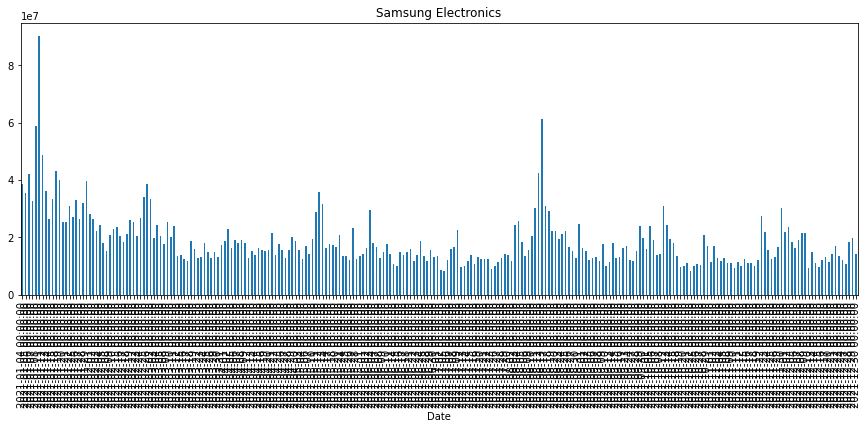

In [39]:
stock_data['Volume'].plot(kind='bar', figsize=(15,5), title = 'Samsung Electronics')

Bar 별로 X 값(일) 을 표시하다 보니, X 축의 날짜가 보이질 않습니다. loc[시작일:종료일] 를 이용해서 1월의 거래량만을 보겠습니다.

<AxesSubplot:title={'center':'Samsung Electronics'}, xlabel='Date'>

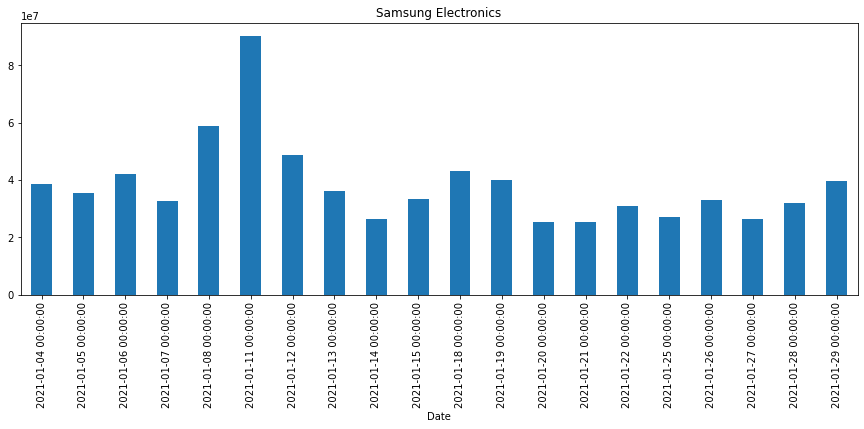

In [40]:
stock_data.loc['2021-01-04':'2021-01-31']['Volume'].plot(kind='bar', figsize=(15,5), title = 'Samsung Electronics')

역시 X 축 값이 너무 깁니다. 년-월-일만 표시하고 싶습니다. 이번에는 stock_data 의 인덱스를 strftime 을 이용해서 년-월-일 의 문자열로 바꿔주고 다시 그래프를 그립니다.

<AxesSubplot:title={'center':'Samsung Electronics'}>

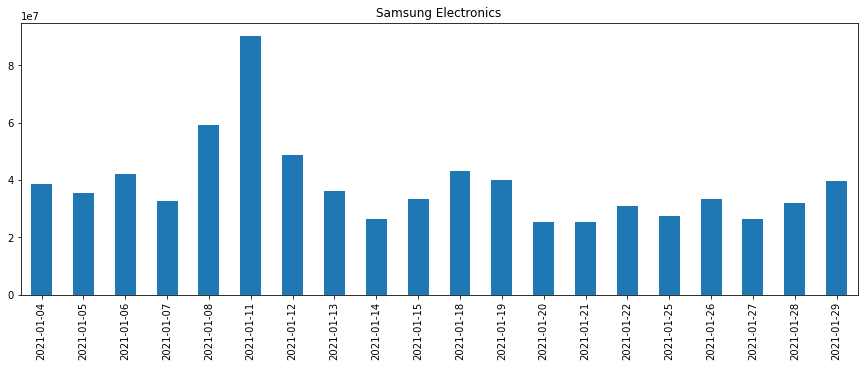

In [41]:
import datetime
stock_data2 = stock_data.copy() # 새로운 DataFrame 생성하고, 새로운 DataFrame 의 index 타입을 변경 
stock_data2.index = [datetime.datetime.strftime(dt, '%Y-%m-%d') for dt in stock_data.index] # Date 으로 되어 있는 index 값을 원하는 모양의 문자열로 변환
stock_data2.loc['2021-01-04':'2021-01-31']['Volume'].plot(kind='bar', figsize=(15,5), title = 'Samsung Electronics')

<br> 이제 주가 Line Chart 와 거래량 Bar Chat 를 한 Chart 에 그리고 싶은 욕구가 생깁니다. Pandas Plot 에서 가능은 한데 복잡합니다. 이 부분은 matplotlib 에서 하겠습니다.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline